Importing the libraries


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

data collection and processing

In [2]:
# loading the csv data to a pandas datframe


In [3]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [4]:
# printing first and last five rows of the dataframe

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# number of rows and columns

In [8]:
gold_data.shape

(2290, 6)

In [9]:
# getting some basic information about the data 

In [10]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# check whether null values or not

In [12]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
# statistical measures of the dataset 

In [14]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation:
1. positive correlation
    if one variable increase, another variable also increase
2. negative correlation
    if one variable increase, another variable decrease
    

In [15]:
correlation = gold_data.corr()

In [16]:
#constructing heat map to understand the correlation

<AxesSubplot:>

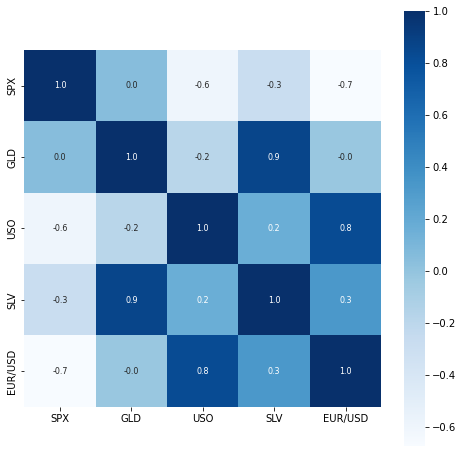

In [19]:
plt.figure(figsize = (8,8) )
sns.heatmap(correlation, cbar=True, square = True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap='Blues')

In [20]:
 # correlation values of GLD

In [21]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [22]:
# checking the distribution of GLD price

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

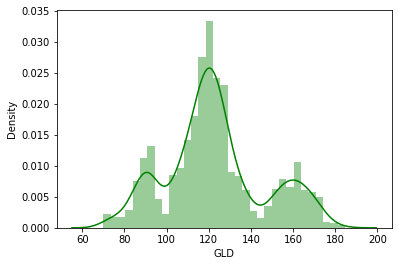

In [23]:
sns.distplot(gold_data['GLD'],color= 'green')

splitting the feautures and target


In [24]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']


In [25]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting the dataset into training set and test set

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

model training:
Random Forest Regressor

In [28]:
regressor = RandomForestRegressor(n_estimators=100)


In [29]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

model evaluation

In [30]:
# prediction on test data
test_data_prediction = regressor.predict(x_test)

In [31]:
print(test_data_prediction)

[168.58789928  81.99289988 116.02690016 127.78470081 120.92830158
 154.73199766 150.03369869 126.08350038 117.51069864 126.04020075
 116.57650127 171.43070082 141.39169863 167.9530996  115.23950016
 117.37270062 139.99910249 170.19640108 159.21240277 163.35209937
 155.07239997 125.23350018 175.93739969 157.20440279 125.20170038
  93.86609945  77.66430022 120.39020026 119.08399915 167.44289961
  88.22250048 125.25840041  91.05650071 117.57510037 121.10489926
 136.5123003  115.35320119 115.13940075 147.79749967 107.08060067
 104.35980286  87.19139808 126.60420032 118.0371999  151.90569871
 119.63850012 108.34399987 108.12069821  93.14460081 127.2597971
  74.5155004  113.74349934 121.19410004 111.12999938 119.01069888
 120.60579943 159.26129997 169.31890092 147.01899687  86.02879888
  94.34180044  86.87259866  90.74240026 119.03590062 126.33340051
 127.58710017 170.4291     122.31109924 117.298499    98.68020011
 168.38300153 142.6674996  132.00680271 121.18490239 120.79359941
 119.865400

In [32]:
# R squared error

In [33]:
error_score = metrics.r2_score(y_test,test_data_prediction) 
print("R squared error : ",error_score)

R squared error :  0.9888388323342888


compare the actual values and Predicted values in a plot

In [34]:
 y_test = list(y_test)

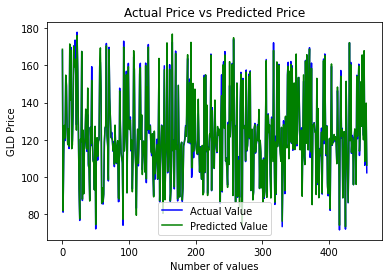

In [35]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()